<a href="https://colab.research.google.com/github/Rubnserrano/TF-Certification/blob/main/01_curso_tensorflow_certificate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

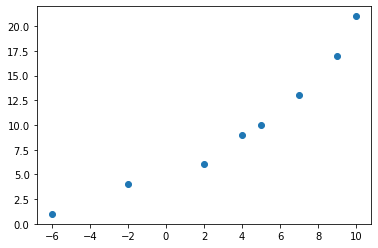

In [2]:
X = np.array([-2.0, 4.0, 9.0, 5.0, 10.0, 7.0, -6.0, 2.0])
y = np.array([4.0, 9.0, 17.0, 10.0, 21.0, 13.0, 1.0, 6.0])

plt.scatter(X,y)

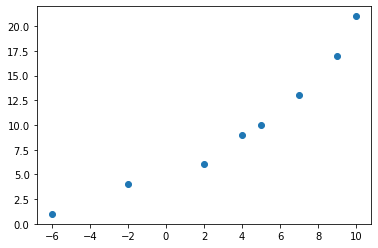

In [3]:
X = tf.constant([-2.0, 4.0, 9.0, 5.0, 10.0, 7.0, -6.0, 2.0])
y = tf.constant([4.0, 9.0, 17.0, 10.0, 21.0, 13.0, 1.0, 6.0])

plt.scatter(X,y)

In [4]:
X[2]

<tf.Tensor: shape=(), dtype=float32, numpy=9.0>

#Steps in modelling with tf
1.- Creating a simply model with Keras.

2.- Compiling a model. Define metrics, loss function and optimizer

3.- Fitting a model

In [5]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

#Note: If you're using TensorFlow 2.7.0+, the fit() function no longer upscales input data to go from (batch_size, ) to (batch_size, 1). 
#To fix this, you'll need to expand the dimension of input data using tf.expand_dims(input_data, axis=-1).
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 815ms/step - loss: 8.0585 - mae: 8.0585
Epoch 2/5
1/1 [==============================] - 0s 24ms/step - loss: 7.9171 - mae: 7.9171
Epoch 3/5
1/1 [==============================] - 0s 10ms/step - loss: 7.7757 - mae: 7.7757
Epoch 4/5
1/1 [==============================] - 0s 20ms/step - loss: 7.6343 - mae: 7.6343
Epoch 5/5
1/1 [==============================] - 0s 14ms/step - loss: 7.4929 - mae: 7.4929


1/1 [==============================] - 0s 192ms/step


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

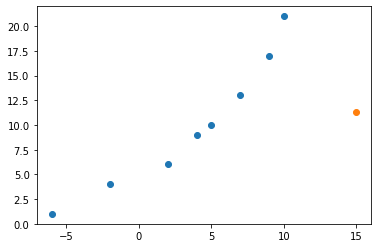

In [7]:
new_X = 15.0
new_y = model.predict([new_X])
plt.scatter(X,y)
plt.scatter(new_X, new_y)
plt

#Not very accurate

# How we could improve a model?
1.- Creating a model -> Add more layers, increase number of neurons in each layer, change the activation function.

2.- Compiling a model -> Changing the learning rate, change optimization function.

3.- Fitting a model -> Increase number of epochs, or on more data.

In [9]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100, verbose = 0)

Epoch 1/100
1/1 [==============================] - 1s 846ms/step - loss: 8.0585 - mae: 8.0585
Epoch 2/100
1/1 [==============================] - 0s 20ms/step - loss: 7.9171 - mae: 7.9171
Epoch 3/100
1/1 [==============================] - 0s 18ms/step - loss: 7.7757 - mae: 7.7757
Epoch 4/100
1/1 [==============================] - 0s 17ms/step - loss: 7.6343 - mae: 7.6343
Epoch 5/100
1/1 [==============================] - 0s 22ms/step - loss: 7.4929 - mae: 7.4929
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 7.3515 - mae: 7.3515
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 7.2101 - mae: 7.2101
Epoch 8/100
1/1 [==============================] - 0s 16ms/step - loss: 7.0687 - mae: 7.0687
Epoch 9/100
1/1 [==============================] - 0s 15ms/step - loss: 6.9273 - mae: 6.9273
Epoch 10/100
1/1 [==============================] - 0s 16ms/step - loss: 6.7859 - mae: 6.7859
Epoch 11/100
1/1 [==============================] - 0s 26ms/step - los

#Re-evaluation of new_X


1/1 [==============================] - 0s 160ms/step


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

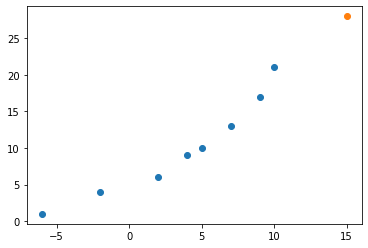

In [11]:
new_X = 15.0
new_y = model.predict([new_X])
plt.scatter(X,y)
plt.scatter(new_X, new_y)
plt

In [12]:
X1 = np.arange(-100,100,4)
y1 = X1 + 10

X_train = X1[:40]
y_train = y1[:40]
X_test = X1[40:]
y_test = y1[40:]

len(X_train), len(y_train)

(40, 40)

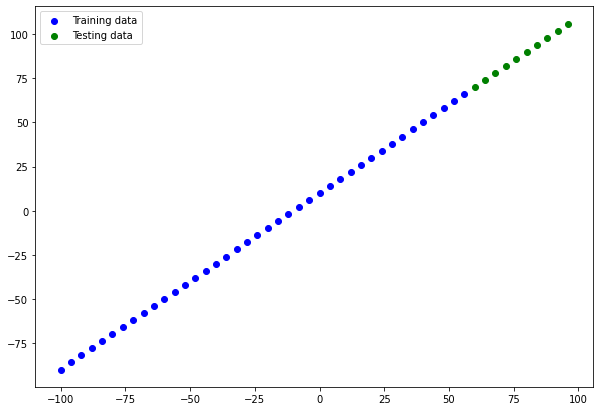

In [13]:
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, c='b', label='Training data')
plt.scatter(X_test, y_test, c='g', label='Testing data')
plt.legend()

In [14]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


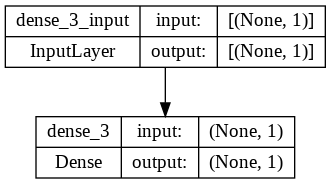

In [15]:
model.summary()
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

1/1 [==============================] - 0s 53ms/step


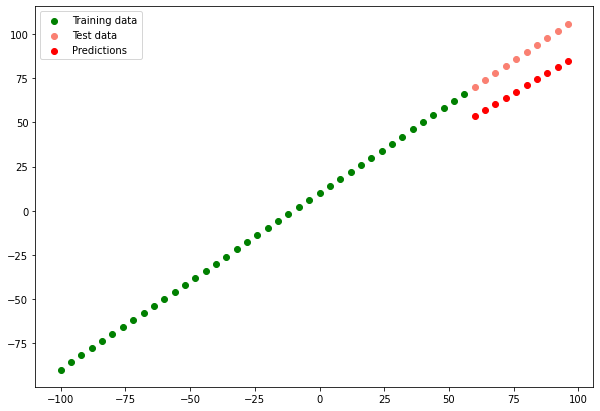

In [16]:
y_preds = model.predict(X_test)

def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = y_preds):
  plt.figure(figsize=(10,7))

  plt.scatter(train_data, train_labels, c='g', label = 'Training data')
  plt.scatter(test_data, test_labels, c='salmon', label = 'Test data')
  plt.scatter(test_data, predictions, c='r', label = 'Predictions')
  plt.legend()

plot_predictions()

In [17]:
mae = tf.metrics.mean_absolute_error(y_true = y_test,
                                     y_pred = y_preds)
print(len(mae), mae)

print(f'Length of y_test: {y_test.shape}, \nLength of y_preds: {y_preds.shape}')

#We get 10 values instead of 1 (the mean)

10 tf.Tensor(
[34.42891  30.943668 27.45843  23.97319  20.487946 17.202168 14.510478
 12.419336 11.018796 10.212349], shape=(10,), dtype=float32)
Length of y_test: (10,), 
Length of y_preds: (10, 1)


In [18]:
y_preds = tf.squeeze(y_preds)
mae = tf.metrics.mean_absolute_error(y_true = y_test,
                                     y_pred = y_preds)
print(mae)

tf.Tensor(18.745327, shape=(), dtype=float32)


In [19]:
mse = tf.metrics.mean_squared_error(y_true = y_test,
                                    y_pred = y_preds)
mse

<tf.Tensor: shape=(), dtype=float32, numpy=353.57336>

In [20]:
def mae(y_test, y_pred):
  return tf.metrics.mean_absolute_error(y_true = y_test,
                                     y_pred = y_pred)

def mse(y_test, y_pred):
  return tf.metrics.mean_squared_error(y_true = y_test,
                                    y_pred = y_pred)
  
print(f'MSE of model: {mse(y_test, y_preds)}, \nMAE of model: {mae(y_test, y_preds)}')

MSE of model: 353.5733642578125, 
MAE of model: 18.74532699584961


# Creation of new models and comparison

In [113]:
tf.random.set_seed(42)
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1]),
    tf.keras.layers.Dense(1)

])

model2.compile(loss = tf.keras.losses.mae,
               optimizer = tf.keras.optimizers.SGD(),
               metrics = ['mae'])

model2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

#model3
tf.random.set_seed(42)
model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1]),
    tf.keras.layers.Dense(1)
])

model3.compile(loss = tf.keras.losses.mae,
               optimizer = tf.keras.optimizers.SGD(),
               metrics = ['mae'])

model3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500, verbose=0)

y_preds2 = model2.predict(X_test)
y_preds3 = model3.predict(X_test)
y_preds2 = y_preds2.squeeze()
y_preds3 = y_preds3.squeeze()
y_preds2 = tf.constant(y_preds2)
y_preds3 = tf.constant(y_preds3)


1/1 [==============================] - 0s 48ms/step


In [112]:
print(y_preds2.shape, y_preds.shape)

(10,) (10,)


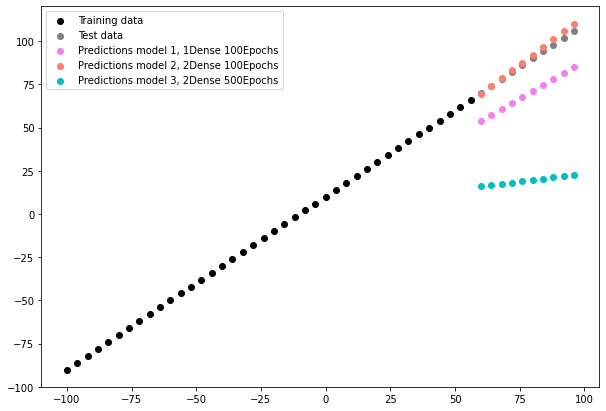

In [114]:

def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions1 = y_preds,
                     predictions2 = y_preds2,
                     predictions3 = y_preds3):
  plt.figure(figsize=(10,7))

  plt.scatter(train_data, train_labels, c='k', label = 'Training data')
  plt.scatter(test_data, test_labels, c='gray', label = 'Test data')
  plt.scatter(test_data, predictions1, c='violet', label = 'Predictions model 1, 1Dense 100Epochs')
  plt.scatter(test_data, predictions2, c='salmon', label = 'Predictions model 2, 2Dense 100Epochs')
  plt.scatter(test_data, predictions3, c='c', label = 'Predictions model 3, 2Dense 500Epochs')
  plt.legend()

plot_predictions()

In [95]:
y_preds2.shape

(10, 1)

In [125]:
maex = mae(y_test, y_preds2)
maex.numpy()

1.9097328

In [126]:
mae3 = mae(y_test, y_preds3).numpy()
mae2 = mae(y_test, y_preds2).numpy()
mae1 = mae(y_test, y_preds).numpy()

mse3 = mse(y_test, y_preds3).numpy()
mse2 = mse(y_test, y_preds2).numpy()
mse1 = mse(y_test, y_preds).numpy()

model_results = [["model1", mae1, mse1],
                 ["model2", mae2, mse2],
                 ['model3', mae3, mse3]]

import pandas as pd
results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
print(results)

    model        mae          mse
0  model1  18.745327   353.573364
1  model2   1.909733     5.458770
2  model3  68.687843  4804.469238


#Saving an loading models

In [129]:
model2.save('best_model_SavedModel_format')
!ls best_model_SavedModel_format


assets	keras_metadata.pb  saved_model.pb  variables


In [130]:
loaded_saved_model = tf.keras.models.load_model('best_model_SavedModel_format')
loaded_saved_model.summary()

Model: "sequential_48"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_64 (Dense)            (None, 1)                 2         
                                                                 
 dense_65 (Dense)            (None, 1)                 2         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


#Mini-project

In [102]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [103]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance_ohe = pd.get_dummies(insurance)
X = insurance_ohe.drop('charges', axis=1)
y = insurance_ohe['charges']

In [104]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [105]:
y_train=y_train.squeeze()
y_train.shape

(1070,)

In [108]:
tf.random.set_seed(42)
model_01 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
    ])

model_01.compile(loss = tf.keras.losses.mae,
                   optimizer = tf.keras.optimizers.SGD(),
                   metrics=['mae'])

historial1 = model_01.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)
model_01.evaluate(X_train, y_train)

34/34 [==============================] - 0s 1ms/step - loss: 8557.2012 - mae: 8557.2012


[8557.201171875, 8557.201171875]

Try:
model02 -> increase to 3 layers

model03 -> increase the number of units in each layer(expect the output layer)

model04-> try adam

In [109]:
tf.random.set_seed(42)
model_02 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
    ])

model_02.compile(loss = tf.keras.losses.mae,
                   optimizer = tf.keras.optimizers.SGD(),
                   metrics=['mae'])

historial2 = model_02.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)
model_02.evaluate(X_train, y_train)


34/34 [==============================] - 0s 2ms/step - loss: 10306.9482 - mae: 10306.9482


[10306.9482421875, 10306.9482421875]

In [111]:
tf.random.set_seed(42)

# Add an extra layer and increase number of units
model_03 = tf.keras.Sequential([
  tf.keras.layers.Dense(100), # 100 units
  tf.keras.layers.Dense(10), # 10 units
  tf.keras.layers.Dense(1) # 1 unit (important for output layer)
])

# Compile the model
model_03.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(), # Adam works but SGD doesn't 
                          metrics=['mae'])

# Fit the model and save the history (we can plot this)
historial3 = model_03.fit(X_train, y_train, epochs=200, verbose=0)
model_03.evaluate(X_train, y_train)

34/34 [==============================] - 0s 1ms/step - loss: 3663.1772 - mae: 3663.1772


[3663.17724609375, 3663.17724609375]

Text(0.5, 0, 'epochs')

<Figure size 720x504 with 0 Axes>

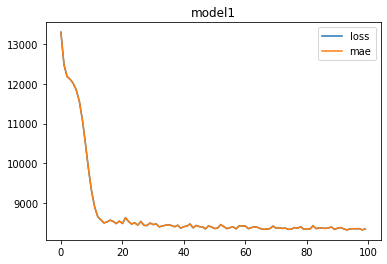

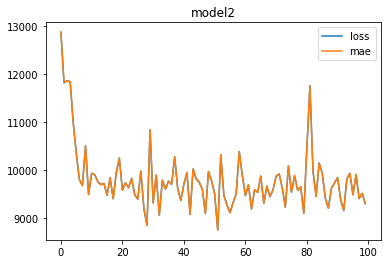

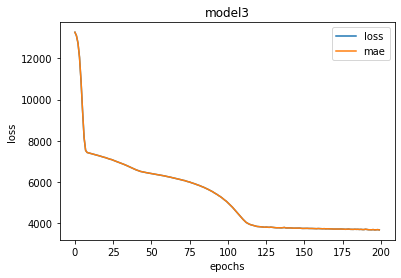

In [78]:
plt.figure(figsize=(10,7))

pd.DataFrame(historial1.history).plot(title = 'model1')
pd.DataFrame(historial2.history).plot(title = 'model2')
pd.DataFrame(historial3.history).plot(title = 'model3')

plt.legend()
plt.ylabel("loss")
plt.xlabel('epochs')

#Preprocessing data
Normalization and standardization.

In [112]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # get all values between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

X = insurance.drop('charges', axis=1)
y = insurance['charges']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

ct.fit(X_train)

X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [115]:
tf.random.set_seed(42)

model_04 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

model_04.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

historial4 = model_04.fit(X_train_normal, y_train, epochs=200, verbose=0)
model_04.evaluate(X_train_normal, y_train)

34/34 [==============================] - 0s 1ms/step - loss: 3480.7642 - mae: 3480.7642


[3480.76416015625, 3480.76416015625]

<Figure size 720x504 with 0 Axes>

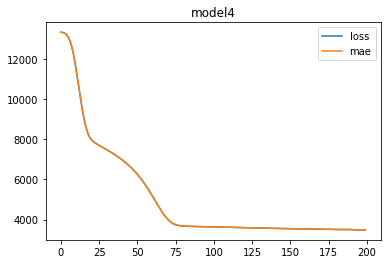

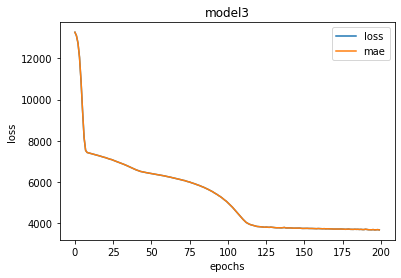

In [117]:
plt.figure(figsize=(10,7))

pd.DataFrame(historial4.history).plot(title = 'model4')
pd.DataFrame(historial3.history).plot(title = 'model3')


plt.legend()
plt.ylabel("loss")
plt.xlabel('epochs')
plt.show()